In [4]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

import warnings; warnings.simplefilter('ignore')

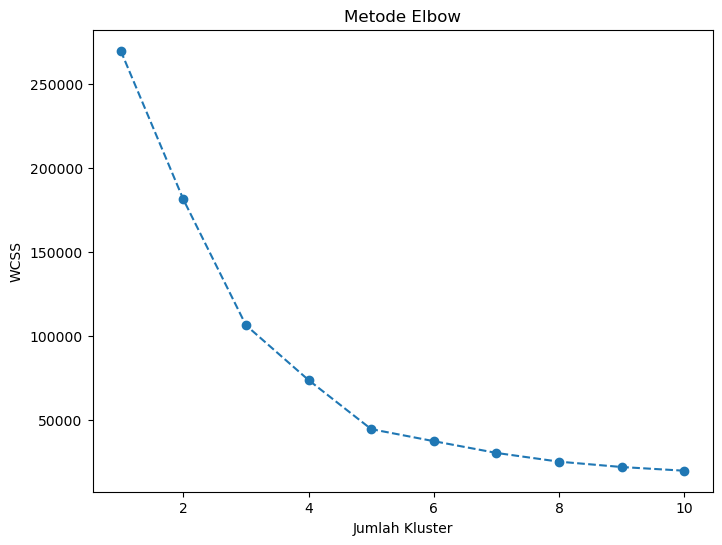

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1    Male   19                  15                      39   
1             2    Male   21                  15                      81   
2             3  Female   20                  16                       6   
3             4  Female   23                  16                      77   
4             5  Female   31                  17                      40   
..          ...     ...  ...                 ...                     ...   
195         196  Female   35                 120                      79   
196         197  Female   45                 126                      28   
197         198    Male   32                 126                      74   
198         199    Male   32                 137                      18   
199         200    Male   30                 137                      83   

     Cluster  
0          3  
1          4  
2          3  
3          4  
4          3

In [5]:
path = "data/csv/mail_customers.csv"
df = pd.read_csv(path)

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Metode Elbow')
plt.xlabel('Jumlah Kluster')
plt.ylabel('WCSS')  # Within-cluster sum of squares
plt.show()

kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(X)

df['Cluster'] = clusters
print(df)